In [14]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df=pd.read_csv('lean_df.csv',index_col='id')
treat_df=df.copy()

In [10]:
treat_df.sample(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
125519266,33000.0,33000.0,33000.0,60 months,23.88,947.05,E,E2,NaN,NaN,OWN,18120.0,Verified,Dec-2017,Late (31-120 days),major_purchase,113xx,NY,2.85,0.0,Jan-2008,665.0,669.0,0.0,NaN,90.0,2.0,1.0,730.0,56.2,4.0,w,29113.59,29113.59,11469.930000,11469.93,3886.41,7583.52,0.0,0.0,0.0,Jan-2019,947.05,Apr-2019,Mar-2019,609.0,605.0,0.0,NaN,Joint App,74720.0,2.92,Source Verified,0.0,0.0,730.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,591.0,56.0,1300.0,0.0,0.0,0.0,0.0,365.0,209.0,73.9,0.0,0.0,NaN,119.0,44.0,44.0,0.0,82.0,NaN,NaN,NaN,0.0,1.0,2.0,1.0,2.0,0.0,2.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,100.0,0.0,1.0,0.0,1300.0,730.0,800.0,0.0,N,Cash,N
653195,7000.0,7000.0,7000.0,60 months,10.37,150.01,B,B3,CT Networks,< 1 year,RENT,60000.0,Not Verified,Jan-2011,Fully Paid,car,117xx,NY,12.18,0.0,Jun-1983,715.0,719.0,0.0,NaN,NaN,13.0,0.0,19039.0,31.2,23.0,f,0.00,0.00,8183.996153,8184.00,7000.00,1184.00,0.0,0.0,0.0,Jan-2013,4892.35,NaN,Feb-2013,724.0,720.0,0.0,NaN,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,Cash,N
132050531,35000.0,35000.0,35000.0,36 months,14.07,1197.41,C,C3,Asset Protection Specalist,3 years,MORTGAGE,125000.0,Source Verified,Apr-2018,Current,debt_consolidation,721xx,AR,19.04,0.0,May-1997,715.0,719.0,0.0,NaN,NaN,13.0,0.0,49174.0,74.4,22.0,f,25816.80,25816.80,13144.150000,13144.15,9183.20,3960.95,0.0,0.0,0.0,Mar-2019,1197.41,Apr-2019,Mar-2019,664.0,660.0,0.0,NaN,Individual,NaN,NaN,NaN,0.0,0.0,274578.0,1.0,2.0,1.0,1.0,1.0,5282.0,16.0,0.0,0.0,19612.0,61.0,66100.0,0.0,1.0,0.0,1.0,21121.0,13488.0,59.3,0.0,0.0,125.0,245.0,48.0,1.0,4.0,115.0,NaN,NaN,NaN,0.0,1.0,6.0,3.0,4.0,5.0,8.0,12.0,6.0,13.0,0.0,0.0,0.0,1.0,100.0,33.3,0.0,0.0,367888.0,71728.0,33100.0,33634.0,N,Cash,N
46174380,15600.0,15600.0,15600.0,36 months,5.93,474.09,A,A1,RN,2 years,MORTGAGE,78000.0,Source Verified,Apr-2015,Fully Paid,debt_consolidation,484xx,MI,23.94,0.0,Sep-2000,740.0,744.0,0.0,NaN,NaN,18.0,0.0,6685.0,39.6,39.0,w,0.00,0.00,17062.005491,17062.01,15600.00,1462.01,0.0,0.0,0.0,Apr-2018,474.00,NaN,Jan-2019,674.0,670.0,0.0,NaN,Individual,NaN,NaN,NaN

#### Consolidate FICO Scores

In [11]:
treat_df['fico']=(treat_df.fico_range_low+treat_df.fico_range_high)/2
treat_df=treat_df.drop(['fico_range_low','fico_range_high','last_fico_range_high','last_fico_range_low'],axis=1)

#### Remove categories with big imbalance in representation (proportion of subcategories <5% in binary categories)

In [31]:
2259836*0.05

112991.8

In [25]:
treat_df['debt_settlement_flag'].value_counts()

N    2226422
Y      34246
Name: debt_settlement_flag, dtype: int64

In [26]:
treat_df['disbursement_method'].value_counts()

Cash         2182546
DirectPay      78122
Name: disbursement_method, dtype: int64

In [27]:
treat_df['hardship_flag'].value_counts()  

N    2259836
Y        832
Name: hardship_flag, dtype: int64

In [32]:
treat_df['initial_list_status'].value_counts()

w    1535467
f     725201
Name: initial_list_status, dtype: int64

In [33]:
treat_df['loan_status'].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [34]:
treat_df['verification_status'].value_counts()

Source Verified    886231
Not Verified       744806
Verified           629631
Name: verification_status, dtype: int64

In [35]:
treat_df['home_ownership'].value_counts()

MORTGAGE    1111450
RENT         894929
OWN          253057
ANY             996
OTHER           182
NONE             54
Name: home_ownership, dtype: int64

In [37]:
treat_df=treat_df.drop(['debt_settlement_flag','disbursement_method','hardship_flag'],axis=1)

(0, 5)

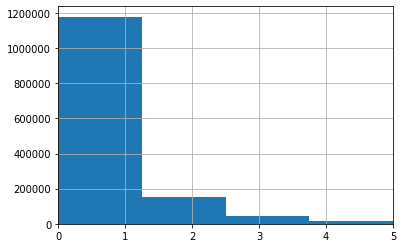

In [20]:
treat_df.open_il_12m.hist(bins=20)
plt.xlim([0,5])

(0, 5)

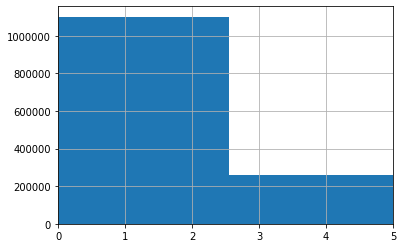

In [22]:
treat_df.open_il_24m.hist(bins=20)
plt.xlim([0,5])

In [12]:
treat_df.sample(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,fico
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
120402201,24000.0,24000.0,24000.0,60 months,21.45,655.38,D,D5,Executive Director Communications,1 year,RENT,200000.0,Verified,Oct-2017,Current,debt_consolidation,606xx,IL,8.67,0.0,Oct-1995,1.0,54.0,81.0,7.0,1.0,3101.0,34.5,14.0,w,19548.8,19548.8,11195.6500,11195.65,4451.20,6744.45,0.0,0.00,0.0000,Mar-2019,738.17,Apr-2019,Mar-2019,0.0,54.0,Individual,NaN,NaN,NaN,0.0,0.0,52920.0,2.0,3.0,2.0,2.0,3.0,49819.0,85.0,1.0,2.0,591.0,79.0,9000.0,2.0,1.0,5.0,4.0,7560.0,1109.0,34.8,0.0,0.0,117.0,63.0,1.0,1.0,0.0,16.0,NaN,3.0,NaN,2.0,1.0,2.0,2.0,2.0,8.0,4.0,4.0,2.0,7.0,0.0,0.0,0.0,3.0,85.7,0.0,1.0,0.0,67389.0,52920.0,1700.0,58389.0,N,Cash,N,677.0
104481664,6600.0,6600.0,6600.0,36 months,11.39,217.30,B,B3,Executive Vice President,10+ years,MORTGAGE,98556.0,Source Verified,Apr-2017,Fully Paid,debt_consolidation,458xx,OH,19.66,1.0,Jun-2003,0.0,16.0,NaN,12.0,0.0,18006.0,57.3,33.0,w,0.0,0.0,7338.1391,7338.14,6600.00,738.14,0.0,0.00,0.0000,Jun-2018,4517.42,NaN,Mar-2019,0.0,NaN,Individual,NaN,NaN,NaN,0.0,0.0,336912.0,0.0,4.0,0.0,3.0,14.0,71185.0,66.0,0.0,0.0,6236.0,63.0,31400.0,0.0,1.0,1.0,4.0,28076.0,2086.0,86.1,0.0,0.0,137.0,166.0,40.0,9.0,6.0,62.0,NaN,10.0,NaN,0.0,3.0,6.0,3.0,7.0,11.0,7.0,16.0,6.0,12.0,0.0,0.0,0.0,1.0,90.9,100.0,0.0,0.0,377308.0,89191.0,15000.0,97008.0,N,Cash,N,692.0
38699980,32000.0,32000.0,32000.0,36 months,17.14,1143.12,D,D4,account manager,3 years,MORTGAGE,160000.0,Verified,Jan-2015,Fully Paid,credit_card,530xx,WI,6.78,1.0,Apr-2001,1.0,23.0,85.0,12.0,1.0,8980.0,55.4,36.0,f,0.0,0.0,37617.7800,37617.78,32000.00,5617.78,0.0,0.00,0.0000,Mar-2016,22787.69,NaN,Sep-2018,0.0,NaN,Individual,NaN,NaN,NaN,0.0,1142.0,267084.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16200.0,NaN,NaN,NaN,6.0,26708.0,925.0,73.6,0.0,0.0,122.0,165.0,4.0,4.0,4.0,42.0,23.0,0.0,23.0,0.0,2.0,5.0,3.0,8.0,10.0,8.0,21.0,5.0,12.0,0.0,0.0,0.0,2.0,97.1,33.3,1.0,0.0,327850.0,19375.0,3500.0,21485.0,N,Cash,N,682.0
55941716,18000.0,18000.0,18000.0,60 months,13.33,412.61,C,C3,anesthesia aide,10+ years,RENT,46760.0,Source Verified,Aug-2015,Charged Off,debt_consolidation,554xx,MN,13.04,0.0,Jul-2003,0.0,NaN,NaN,9.0,0.0,11478.0,58.9,15.0,w,0.0,0.0,12268.5300,12268.53,7229.44,4722.92,0.0,316.17,56.9106,Jan-2018,412.61,NaN,Mar-2019,0.0,NaN,Individual,NaN,NaN,NaN,0.0,0.0,14006.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
# X = train.drop('Loan_Status', axis=1)
# y = train['Loan_Status']
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# numeric_features = train.select_dtypes(include=['int64', 'float64']).columns
# categorical_features = train.select_dtypes(include=['object']).drop(['Loan_Status'], axis=1).columns
# from sklearn.compose import ColumnTransformer
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)])

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# rf = Pipeline(steps=[('preprocessor', preprocessor),
#                       ('classifier', RandomForestClassifier())])

In [ ]:
# rf.fit(X_train, y_train)
# y_pred = rf.predict(X_test)

In [ ]:
# from sklearn.metrics import accuracy_score, log_loss
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC, LinearSVC, NuSVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# classifiers = [
#     KNeighborsClassifier(3),
#     SVC(kernel="rbf", C=0.025, probability=True),
#     NuSVC(probability=True),
#     DecisionTreeClassifier(),
#     RandomForestClassifier(),
#     AdaBoostClassifier(),
#     GradientBoostingClassifier()
#     ]
# for classifier in classifiers:
#     pipe = Pipeline(steps=[('preprocessor', preprocessor),
#                       ('classifier', classifier)])
#     pipe.fit(X_train, y_train)   
#     print(classifier)
#     print("model score: %.3f" % pipe.score(X_test, y_test))